In [1]:
import pandas as pd

dataset = pd.read_csv('cluster_3.csv')
print(dataset.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.45             0.49               2                   149   
1                0.09             0.85               6                   289   
2                0.44             0.51               2                   156   
3                0.45             0.53               2                   129   
4                0.37             0.46               2                   149   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0      6   
1                   4              0     1                      0      3   
2                   3              0     1                      0      9   
3                   3              0     1                      0      9   
4                   3              0     1                      0      5   

   salary  cluster  
0       0        2  
1       0        2  

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataset[dataset.drop(['cluster', 'salary', 'sales', 'promotion_last_5years', 'left', 'Work_accident'], axis=1).columns] = scaler.fit_transform(
    dataset[dataset.drop(['cluster', 'salary', 'sales', 'promotion_last_5years', 'left', 'Work_accident'], axis=1).columns]
)

print(dataset.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.395604         0.203125             0.0              0.251185   
1            0.000000         0.765625             0.8              0.914692   
2            0.384615         0.234375             0.0              0.284360   
3            0.395604         0.265625             0.0              0.156398   
4            0.307692         0.156250             0.0              0.251185   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0               0.125              0     1                      0      6   
1               0.250              0     1                      0      3   
2               0.125              0     1                      0      9   
3               0.125              0     1                      0      9   
4               0.125              0     1                      0      5   

   salary  cluster  
0       0        2  
1       0        2  

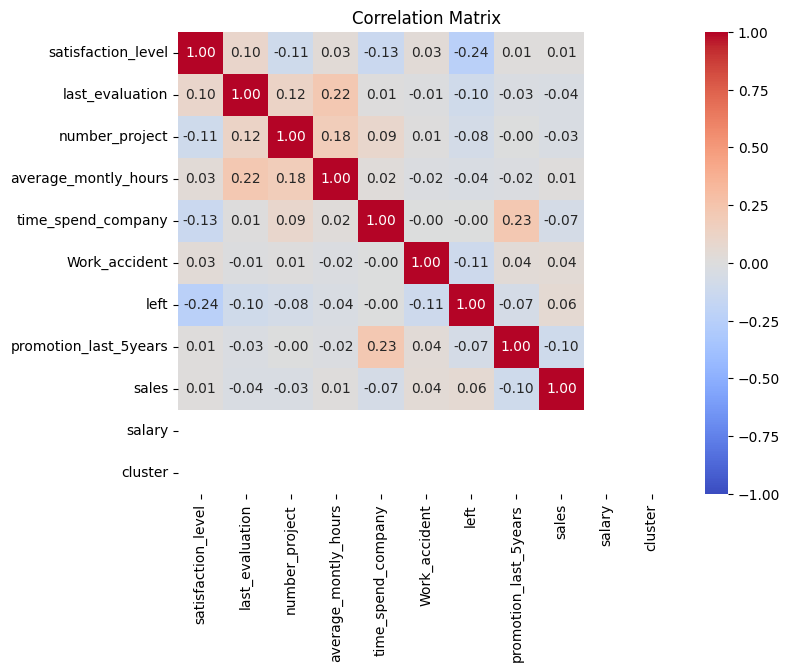

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = dataset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [4]:
x = dataset.drop(['left', 'cluster'], axis=1)
y = dataset['left']

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Training Data Size : {len(x_train)}")
print(f"Testing Data Size : {len(x_test)}")

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

print(f'KNN Results:\nAccuracy: {accuracy_score(y_test, y_pred_knn)}\nRecall: {recall_score(y_test, y_pred_knn)}')

KNN Results:
Accuracy: 0.9475806451612904
Recall: 0.6111111111111112


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

print(f'SVM Results:\nAccuracy: {accuracy_score(y_test, y_pred_svm)}\nRecall: {recall_score(y_test, y_pred_svm)}')

SVM Results:
Accuracy: 0.9274193548387096
Recall: 0.0


In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score

# Naive Bayes model
nb = GaussianNB()
nb.fit(x_train, y_train)

# Predictions
y_pred_nb = nb.predict(x_test)

print(f'NB Results:\nAccuracy: {accuracy_score(y_test, y_pred_nb)}\nRecall: {recall_score(y_test, y_pred_nb)}')

NB Results:
Accuracy: 0.29435483870967744
Recall: 1.0


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def create_ann(units, activation, optimizer, learning_rate, batch_size, weight_decay, hidden_layers):
    model = Sequential()
    
    # Add first hidden layer
    model.add(Dense(units=units, activation=activation, input_dim=x_train.shape[1]))
    
    # Add additional hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(units=units, activation=activation))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    
    # Compile the model
    optimizer_instance = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer_instance, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [10]:
params = {'units': 64, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.000813, 
                  'batch_size': 32, 'weight_decay': 0.000011, 'hidden_layers': 3, 'epochs': 150}

model = create_ann(
        units=params['units'],
        activation=params['activation'],
        optimizer=params['optimizer'],
        learning_rate=params['learning_rate'],
        batch_size=params['batch_size'],
        weight_decay=params['weight_decay'],
        hidden_layers=params['hidden_layers']
    )

c:\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.fit(x_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

In [12]:
# Evaluate the model on the test data
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [13]:
from sklearn.metrics import accuracy_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nResults Before Augmentation:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")


Results Before Augmentation:
Accuracy: 0.9838709677419355
Recall: 0.8888888888888888


In [14]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for class imbalance (if necessary)
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Create DataFrames with consistent indices
x_resampled_df = pd.DataFrame(x_resampled, columns=x.columns)  # Resampled features
y_resampled_df = pd.Series(y_resampled, name='left')  # Resampled target

# Combine the resampled features and target
augmented_dataset = pd.concat([x_resampled_df, y_resampled_df], axis=1)

In [15]:
print(augmented_dataset.groupby('left').count())

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0                   1155             1155            1155   
1                   1155             1155            1155   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0                     1155                1155           1155   
1                     1155                1155           1155   

      promotion_last_5years  sales  salary  
left                                        
0                      1155   1155    1155  
1                      1155   1155    1155  


In [16]:
x = augmented_dataset.drop(['left'], axis=1)
y = augmented_dataset['left']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
model.fit(x_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

In [19]:
# Evaluate the model on the test data
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [20]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nResults After Augmentation:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")


Results After Augmentation:
Accuracy: 0.9891774891774892
Recall: 0.9957627118644068


c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
ExactExplainer explainer: 2311it [01:00, 36.34it/s]                          


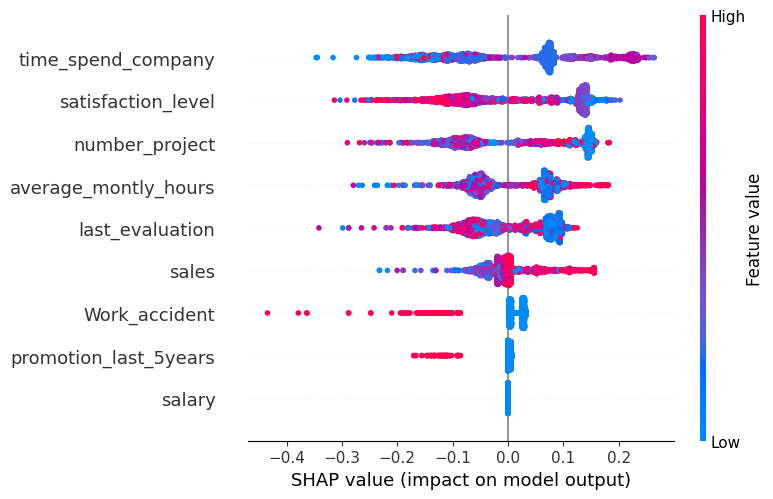

In [21]:
import shap

shap_explainer = shap.Explainer(model, x)
shap_values = shap_explainer(x)

shap.summary_plot(shap_values, x)